<a href="https://colab.research.google.com/github/volley84/rpe/blob/master/%D0%94%D0%BB%D1%8F_%D0%9A%D1%80%D0%B0%D1%81%D0%BD%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reset
from numpy import exp, array, random, dot, meshgrid, arange, c_
training_set_inputs = array([[0, 0], [0, 1], [1, 0], [1, 1],[1, 0.9]])
training_set_outputs = array([0, 0, 0, 1, 1]).T

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
X=training_set_inputs.T
Y=training_set_outputs.reshape((1,5)) 
print(Y)

[[0 0 0 1 1]]


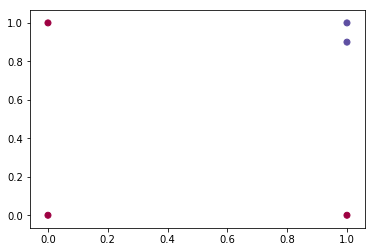

In [0]:
import matplotlib.pyplot as plt
plt.scatter(X[0, :],X[1, :], c=Y.ravel().tolist(), cmap=plt.cm.Spectral)

In [0]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 5)
The shape of Y is: (1, 5)
I have m = 5 training examples!


In [0]:
import sklearn
import sklearn.linear_model
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [0]:
import matplotlib.pyplot as plt
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = meshgrid(arange(x_min, x_max, h), arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Accuracy of logistic regression: 100 % (percentage of correctly labelled datapoints)


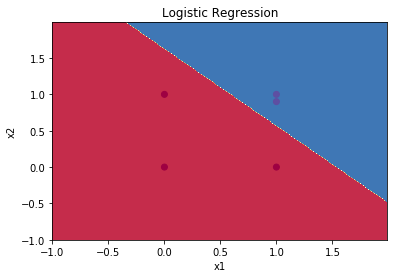

In [0]:


# Plot the decision boundary for logistic regression
#plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plot_decision_boundary(lambda x: clf.predict(x), X, Y.ravel().tolist())
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((dot(Y,LR_predictions) + dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")